# Importance of Predicting Sales Using Multiple Linear Regression Model
The multiple linear regression model is an important analytical approach for examining relationships involving one dependent variable and multiple independent variables. Unlike the simple linear regression model, which is limited to one dependent and one independent variable, multiple linear regression allows the inclusion of several independent variables in the model. This makes it especially useful for understanding how various factors (variables) — such as TV, radio, social media engagement, and influencer campaigns—collectively influence sales outcomes. By analyzing these relationships, the business can identify which strategies yield the highest returns and allocate resources more effectively. Furthermore, the model helps to determine the most significant variables, enabling businesses to understand which factors have a positive or negative impact on sales and make data-driven decisions accordingly.

In [1]:
# Import Data Files from Google Drive

import requests
import pandas as pd
from io import StringIO
def read_gd(sharingurl):
    file_id = sharingurl.split('/')[-2]
    download_url='https://drive.google.com/uc?export=download&id=' + file_id
    url = requests.get(download_url).text
    csv_raw = StringIO(url)
    return csv_raw

url = "https://drive.google.com/file/d/1WChLou3qt_JaPjYLZBMHJ8WxSssQ-enL/view?usp=drive_link"
gdd = read_gd(url)

df = pd.read_csv(gdd)
print("First Five Rows")
df.head()

First Five Rows


,TV,Radio,Social Media,Influencer,Sales
0,Low,3.518070,2.293790,Micro,55.261284
1,Low,7.756876,2.572287,Mega,67.574904
2,High,20.348988,1.227180,Micro,272.250108
3,Medium,20.108487,2.728374,Mega,195.102176
4,High,31.653200,7.776978,Nano,273.960377


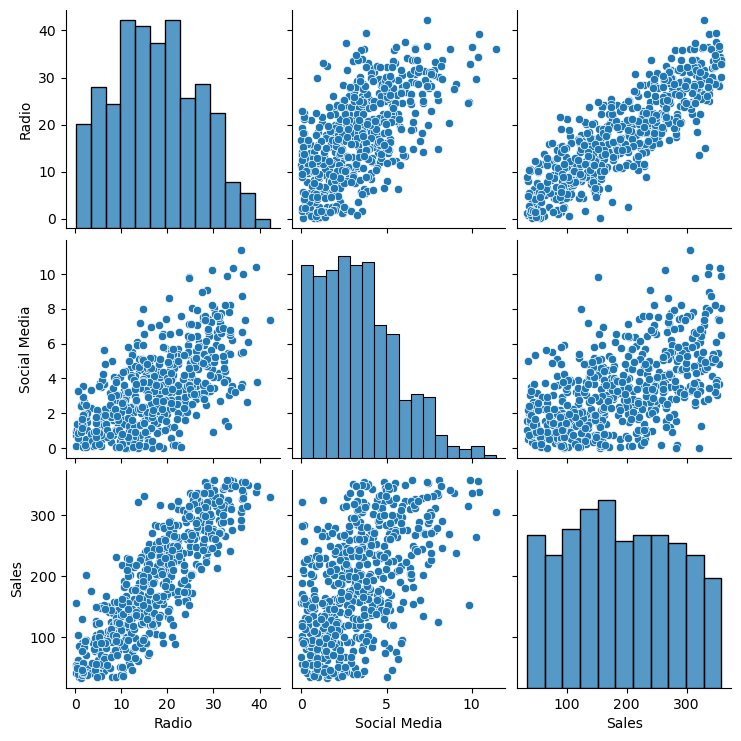

In [ ]:
# Creating a Pairplot with only continuous variables 
# Select only numeric columns (continuous variables)

import seaborn as sns
continuous_vars = ['Radio', 'Social Media', 'Sales']
sns.pairplot(df[continuous_vars])

In [2]:
df.shape

(572, 5)

In [3]:
# Dropping Missing Data Using DROPNA

df.dropna()

,TV,Radio,Social Media,Influencer,Sales
0,Low,3.518070,2.293790,Micro,55.261284
1,Low,7.756876,2.572287,Mega,67.574904
2,High,20.348988,1.227180,Micro,272.250108
3,Medium,20.108487,2.728374,Mega,195.102176
4,High,31.653200,7.776978,Nano,273.960377
...,...,...,...,...,...
567,Medium,14.656633,3.817980,Micro,191.521266
568,High,28.110171,7.358169,Mega,297.626731
569,Medium,11.401084,5.818697,Nano,145.416851
570,Medium,21.119991,5.703028,Macro,209.326830


In [4]:
print ("No Missing Values in the dataset")
df.dropna().shape

No Missing Values in the dataset


(572, 5)

In [5]:
# Encode categorical variables
tv_dummies = pd.get_dummies(df['TV'])
tv_encoded = tv_dummies.idxmax(axis=1).str.replace('TV_', '')
tv_encoded = tv_encoded.astype('category').cat.codes

inf_dummies = pd.get_dummies(df['Influencer'])
inf_encoded = inf_dummies.idxmax(axis=1).str.replace('Influencer_', '')
inf_encoded = inf_encoded.astype('category').cat.codes



In [6]:
# Step 4: Concatenate back to original dataframe
New_data = pd.concat([df.drop(['TV', 'Influencer'], axis=1),
                      tv_encoded.rename('TV'),
                      inf_encoded.rename('Influencer')], axis=1)
print(New_data)

         Radio  Social Media       Sales  TV  Influencer
0     3.518070      2.293790   55.261284   1           2
1     7.756876      2.572287   67.574904   1           1
2    20.348988      1.227180  272.250108   0           2
3    20.108487      2.728374  195.102176   2           1
4    31.653200      7.776978  273.960377   0           3
..         ...           ...         ...  ..         ...
567  14.656633      3.817980  191.521266   2           2
568  28.110171      7.358169  297.626731   0           1
569  11.401084      5.818697  145.416851   2           3
570  21.119991      5.703028  209.326830   2           0
571  13.221237      3.660566  135.773151   1           2

[572 rows x 5 columns]


In [7]:
from sklearn.model_selection import train_test_split

x = New_data.drop('Sales', axis=1)
y = New_data['Sales']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state= 42)


In [12]:
pip install statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.8 MB 311.4 kB/s eta 0:00:30
   ---- ----------------------------------- 1.0/9.8 MB 720.8 kB/s eta 0:00:13
   ---- ----------------------------------- 1.0/9.8 MB 720.8 kB/s eta 0:00:13
   ---- ----------------------------------- 1.0/9.8 MB 720.8 kB/s eta 0:00:13
   ---- ----------------------------------- 1.0/9.8 MB 720.8 kB/s eta 0:00:13
   ---- ----------------------------------- 1.0/9.8 MB 720.8 kB/s eta 0:00:13
   ---- ----------------------------------- 1.0/9

In [13]:



import statsmodels.formula.api as smf

# Fit OLS model with the formula interface
model = smf.ols(formula='Sales ~ Q("Radio") + Q("Social Media") + Q("TV") + Q("Influencer")', 
                data=New_data)

# Fit the model
results = model.fit()

# Print the summary
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     411.4
Date:                Wed, 09 Apr 2025   Prob (F-statistic):          4.89e-166
Time:                        22:20:27   Log-Likelihood:                -2994.8
No. Observations:                 572   AIC:                             6000.
Df Residuals:                     567   BIC:                             6021.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            61.9406      6.60

In [14]:
# Making Predictions
y_pred = results.predict(x_test)
y_pred

512    134.236573
70     160.149491
131    238.372766
404    101.014304
543    284.230354
          ...    
75     291.796228
250    238.382538
529    237.367792
522    202.728481
68     107.697259
Length: 115, dtype: float64

In [15]:
#Evaluation Metrics


from sklearn.metrics import mean_squared_error, r2_score
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))


MSE: 2473.7057770110523
R²: 0.6841546692569034


In [19]:
pip install matplotlib

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 514.3 kB/s eta 0:00:15
   -- ------------------------------------- 0.5/8.1 MB 514.3 kB/s eta 0:00:15
   --- ------------------------------------ 0.8/8.1 MB 545.1 kB/s eta 0:00:14
   --- ------------------------------------ 0.8/8.1 MB 545.1 kB/s eta 0:00:14
   --- ------------------------------------ 0.8/8.1 MB 545.1 kB/s eta 0:00:14
   --- ------------------------------------ 0.8/8.1 MB 545.1 kB/s eta 0:00:14
   --- ------------------------------------ 0.8/8.1 MB 545.1 kB/s eta 0:00:14
   --- ---------------------------------

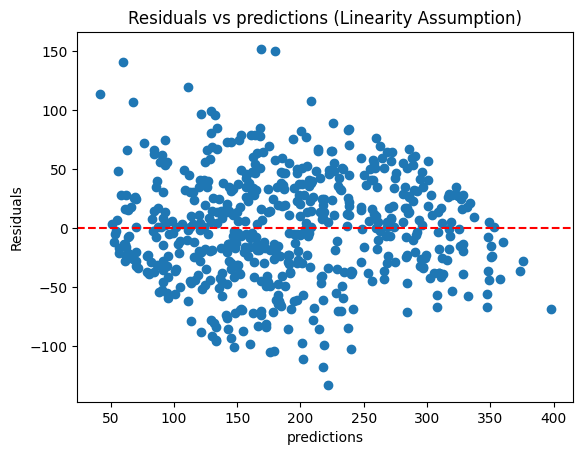

In [20]:
##Evaluating the Model


import matplotlib.pyplot as plt
import statsmodels.api as sm
#Linearity Assumption Check

#calculating residual 

residuals = results.resid

# Calculate predictions
predictions = results.fittedvalues

# Plot residuals vs. fitted values
plt.scatter(predictions, residuals)
plt.axhline(y=0, color='r', linestyle='--')  # Horizontal line at 0
plt.xlabel('predictions')
plt.ylabel('Residuals')
plt.title('Residuals vs predictions (Linearity Assumption)')
plt.show()


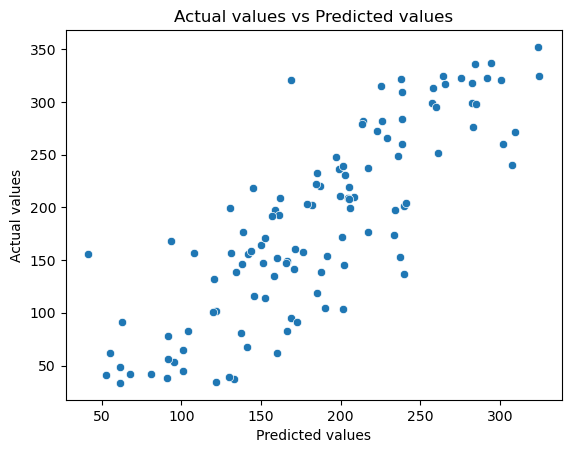

In [30]:
#Predicted vs Actual Values


sns.scatterplot(x = y_pred, y = y_test)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Actual values vs Predicted values')
plt.show()

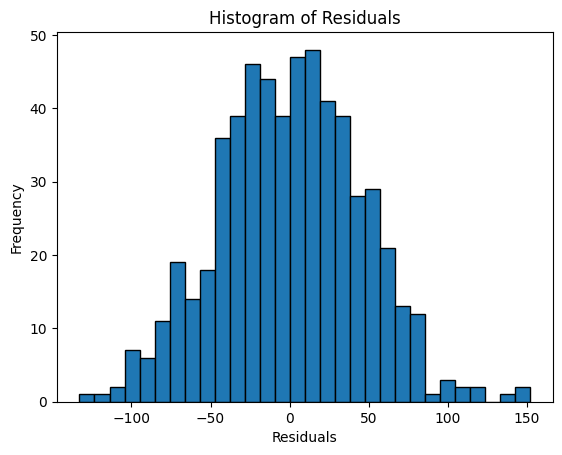

In [21]:
#Normality Assumption


plt.hist(residuals, bins=30, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()



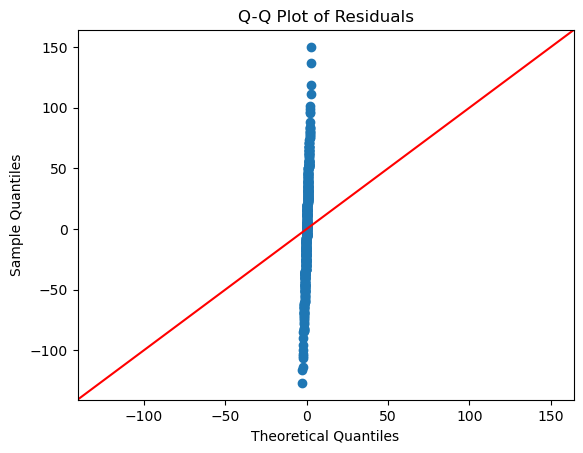

In [130]:
#Q-Q PLOTS


import statsmodels.api as sm

# Q-Q plot to check normality
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot of Residuals')
plt.show()


In [22]:
from statsmodels.stats.diagnostic import het_breuschpagan
import numpy as np

residuals = results.resid
exog = results.model.exog
bp_test = het_breuschpagan(residuals, exog)

labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print(dict(zip(labels, bp_test)))


{'Lagrange multiplier statistic': np.float64(5.486296587127974), 'p-value': np.float64(0.24093664917979324), 'f-value': np.float64(1.3727515089932798), 'f p-value': np.float64(0.2420057914431327)}


In [24]:
# Model Summary


print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     411.4
Date:                Wed, 09 Apr 2025   Prob (F-statistic):          4.89e-166
Time:                        22:26:24   Log-Likelihood:                -2994.8
No. Observations:                 572   AIC:                             6000.
Df Residuals:                     567   BIC:                             6021.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            61.9406      6.60

## Overall Model Performance

1. R-squared has a value of 0.744. This means the model explains 74.4% of the variation in Sales using the predictors (Radio, Social Media, TV, Influencer), which is somewhat strong. 
2. Adjusted R-squared = 0.742: This is slightly lower because it adjusts for the number of predictors; however still solid since it suggests that the model is not overfitting

## Coeficient Interpretation 
1. Radio has a coefficient of 7.94, which means that for every 1 unit in radio spend, sales increase by 7.95 units. Also, Radio has a p-value of 0.0, which implies that the variable has a SIGNIFICANT effect on Sales Price.
2. Social Media has a very low coefficient of 0.02. This implies that the variable has a non-significant effect on sales price
3. TV has a negative coefficient of -10.57, which implies that for every 1 unit spent in TV, Sales decrease by 10.57 Units. The effect is negative but still very significant. In short, TV impacts sales negatively.
4. Influencer types have a coefficient of -0.30, which is very tiny and not significant. This implies that the influenver variable does not have a significant effect on sales price. 


In [25]:
import joblib
joblib.dump(results, "capstone.pkl")

['capstone.pkl']

In [39]:
capstone = joblib.load("capstone.pkl")

# You can now use it, e.g.:
print(capstone.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     411.4
Date:                Wed, 09 Apr 2025   Prob (F-statistic):          4.89e-166
Time:                        21:24:02   Log-Likelihood:                -2994.8
No. Observations:                 572   AIC:                             6000.
Df Residuals:                     567   BIC:                             6021.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            61.9406      6.60

In [26]:
pip install streamlit


   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.8 MB 289.8 kB/s eta 0:00:33
   -- ------------------------------------- 0.5/9.8 MB 289.8 kB/s eta 0:00:33
   -- ------------------------------------- 0.5/9.8 MB 289.8 kB/s eta 0:00:33
   --- ------------------------------------ 0.8/9.8 MB 367.2 kB/s eta 0:00:25
   --- ------------------------------------ 0.8/9.8 MB 367.2 kB/s e

In [28]:
# app.py

import streamlit as st
import pandas as pd
import joblib

# Load your trained model
capstone = joblib.load("capstone.pkl")

st.title("📊 Capstone Company Sales Prediction App")

st.markdown("Enter your budget and select categories (they'll be auto-encoded):")

# Dropdown mappings for encoded values
tv_options = {'TV_A': 0, 'TV_B': 1, 'TV_C': 2, 'TV_D': 3}
influencer_options = {'Micro': 0, 'Macro': 1, 'Mega': 2, 'Nano': 3}

# Feature inputs
radio = st.number_input("Radio Budget", min_value=0.0)
social_media = st.number_input("Social Media Budget", min_value=0.0)

tv_choice = st.selectbox("TV Channel", list(tv_options.keys()))
influencer_choice = st.selectbox("Influencer Type", list(influencer_options.keys()))

# Encode selected values
tv_encoded = tv_options[tv_choice]
influencer_encoded = influencer_options[influencer_choice]

# Prepare input for prediction
input_data = pd.DataFrame([{
    'Radio': radio,
    'Social Media': social_media,
    'TV': tv_encoded,
    'Influencer': influencer_encoded
}])

# Prediction
if st.button("Predict Sales"):
    prediction = capstone.predict(input_data)
    st.success(f"📈 Predicted Sales: {prediction[0]:.2f}")


2025-04-09 22:51:32.705 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-09 22:51:32.708 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-09 22:51:32.710 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-09 22:51:32.717 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-09 22:51:32.720 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-09 22:51:32.725 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-09 22:51:32.730 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-09 22:51:32.734 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [29]:
streamlit run app.py


SyntaxError: invalid syntax (507122745.py, line 1)